### NAIVE BAYES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Customer_Behaviour.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

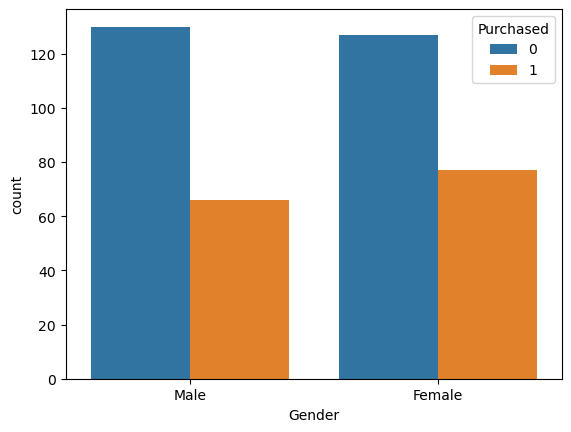

In [6]:
sns.countplot(df, x = 'Gender', hue='Purchased')

C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


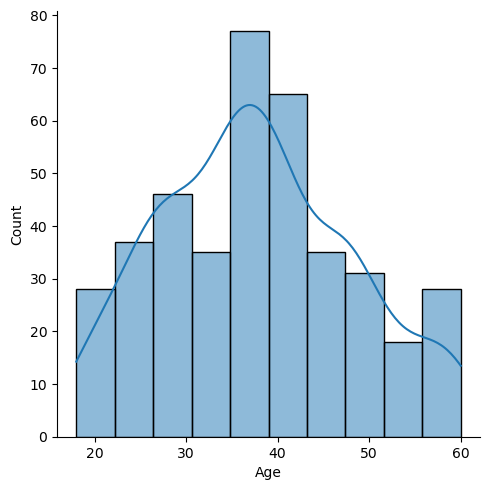

In [7]:
sns.displot(df['Age'],kde = True)

C:\Users\GABRIEL SIMDIMA\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


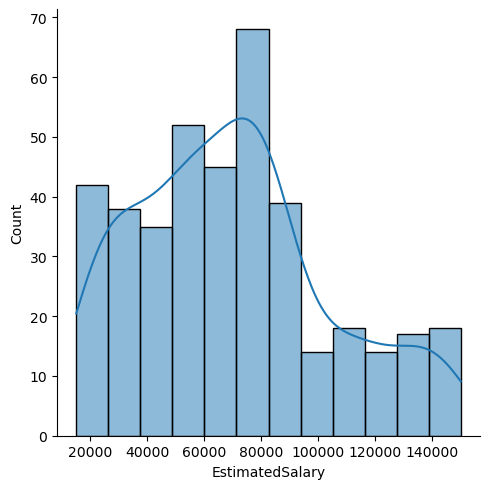

In [8]:
sns.displot(df['EstimatedSalary'],kde = True)

In [9]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
Encode = LabelEncoder()

In [12]:
df['EGender'] = Encode.fit_transform(df['Gender'])

In [13]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,EGender
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df.drop(['User ID','Gender','Purchased'],axis=1)
y = df['Purchased']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [16]:
from sklearn.naive_bayes import MultinomialNB
Model = MultinomialNB()

In [17]:
Model.fit(X_train,y_train)

MultinomialNB()

In [18]:
Model.score(X_train,y_train)

0.6821428571428572

In [19]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range=(18,60))

In [20]:
scaledX_train=scale.fit_transform(X_train)
scaledX_test=scale.fit_transform(X_test)

In [21]:
scaledX_train_df=pd.DataFrame(scaledX_train,columns=X.columns)
scaledX_test_df=pd.DataFrame(scaledX_test,columns=X.columns)

In [22]:
Model.fit(scaledX_train_df,y_train)

MultinomialNB()

In [27]:
Model.score(scaledX_train_df,y_train)

0.5285714285714286

In [33]:
from sklearn.preprocessing import OneHotEncoder
Encode2 = OneHotEncoder(sparse_output=False).set_output(transform='pandas')

In [36]:
GenderE = Encode2.fit_transform(df[['Gender']])
GenderE

,Gender_Female,Gender_Male
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
395,1.0,0.0
396,0.0,1.0
397,1.0,0.0
398,0.0,1.0


In [38]:
df1 = pd.concat([df,GenderE],axis=1)

In [40]:
df1.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,EGender,Gender_Female,Gender_Male
0,15624510,Male,19,19000,0,1,0.0,1.0
1,15810944,Male,35,20000,0,1,0.0,1.0
2,15668575,Female,26,43000,0,0,1.0,0.0
3,15603246,Female,27,57000,0,0,1.0,0.0
4,15804002,Male,19,76000,0,1,0.0,1.0


In [44]:
A = df.drop(['User ID','Gender','Purchased','EGender'],axis=1)
b = df1['Purchased']

In [45]:
X_train,X_test,y_train,y_test=train_test_split(A,b,test_size=0.3,random_state=101)

In [46]:
scaledX_train=scale.fit_transform(X_train)

In [47]:
scaledX_train_df=pd.DataFrame(scaledX_train,columns=A.columns)

In [48]:
Model.fit(X_train,y_train)

MultinomialNB()

In [49]:
Model.score(X_train,y_train)

0.6357142857142857

In [50]:
Model.fit(scaledX_train_df,y_train)

MultinomialNB()

In [51]:
Model.score(scaledX_train_df,y_train)

0.7142857142857143

In [24]:
Model.score(scaledX_test_df,y_test)

0.5333333333333333

In [25]:
from sklearn.metrics import classification_report,confusion_matrix